<a href="https://colab.research.google.com/github/youssefbelkhiri/machine_learning_models/blob/main/tomorrow_raining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [207]:
dataset = pd.read_csv("weatherAUS.csv")

In [208]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [209]:
categorical_columns = dataset.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [210]:
dataset['WindGustDir'] = dataset['WindGustDir'].fillna(dataset['WindGustDir'].mode()[0])
dataset['WindDir9am'] = dataset['WindDir9am'].fillna(dataset['WindDir9am'].mode()[0])
dataset['WindDir3pm'] = dataset['WindDir3pm'].fillna(dataset['WindDir3pm'].mode()[0])
dataset['RainToday'] = dataset['RainToday'].fillna(dataset['RainToday'].mode()[0])

In [211]:
def wrangle(data):
  data = data.copy()
  data["Date"] = pd.to_datetime(data["Date"])
  data['Month'] = data["Date"].dt.month
  data['Year'] = data["Date"].dt.year
  data['Day'] = data["Date"].dt.day
  data = data[data["Year"]<2014]
  data = data.drop("Date", axis=1)
  data = data[data["Location"]=="Sale"]
  data = data.drop('Location', axis=1)
  data = data.dropna(axis=0, how='any', subset=["RainTomorrow"])
  return data

In [212]:
dataset=wrangle(dataset)

In [213]:
categorical_features = ['Year', 'Month', 'Day', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday']

In [214]:
dataset.columns


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Year', 'Day'],
      dtype='object')

In [215]:
from sklearn.preprocessing import LabelEncoder

lencoders = {}
features = ['Year', 'Month', 'Day', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow']
for col in dataset[features].columns:
    lencoders[col] = LabelEncoder()
    dataset[col] = lencoders[col].fit_transform(dataset[col])

In [216]:
dataset[categorical_features].head()

Year  Month  Day  WindGustDir  WindDir9am  WindDir3pm  RainToday
61182     0      0    0           15          13          15          0
61183     0      0    1           13          13          15          0
61184     0      0    2            2          14           2          0
61185     0      0    3            2          11           0          0
61186     0      0    4            1          14           9          0

In [217]:
dataset.shape

(1737, 24)

In [218]:
dataset.isnull().sum()

MinTemp           1
MaxTemp           1
Rainfall          0
Evaporation      21
Sunshine         38
WindGustDir       0
WindGustSpeed    23
WindDir9am        0
WindDir3pm        0
WindSpeed9am      2
WindSpeed3pm      2
Humidity9am       5
Humidity3pm       4
Pressure9am      13
Pressure3pm      12
Cloud9am         19
Cloud3pm         23
Temp9am           1
Temp3pm           1
RainToday         0
RainTomorrow      0
Month             0
Year              0
Day               0
dtype: int64

In [219]:
encoded_data = dataset.copy()

In [220]:
numerical_columns = encoded_data.select_dtypes(include=['int','float','float64']).columns
print(numerical_columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Year', 'Day'],
      dtype='object')


In [221]:
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']
print(encoded_data[numerical_features].describe())

           MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  1736.000000  1736.000000  1737.000000  1716.000000  1699.000000   
mean      8.273214    20.052938     1.539724     3.731818     6.643496   
std       4.929882     5.760589     4.432389     2.440258     3.637554   
min      -3.900000     9.400000     0.000000     0.000000     0.000000   
25%       4.700000    15.500000     0.000000     1.800000     4.000000   
50%       8.000000    19.000000     0.000000     3.200000     7.000000   
75%      11.800000    23.300000     0.800000     5.200000     9.400000   
max      21.500000    44.400000    54.200000    18.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    1714.000000   1735.000000   1735.000000  1732.000000  1733.000000   
mean       42.929405     14.564265     22.664553    77.770785    55.251010   
std        16.556938      9.529369     10.460911    14.110605    16.046767   
min        11.000000 

In [222]:
encoded_data[numerical_features].isnull().sum()

MinTemp           1
MaxTemp           1
Rainfall          0
Evaporation      21
Sunshine         38
WindGustSpeed    23
WindSpeed9am      2
WindSpeed3pm      2
Humidity9am       5
Humidity3pm       4
Pressure9am      13
Pressure3pm      12
Cloud9am         19
Cloud3pm         23
Temp9am           1
Temp3pm           1
dtype: int64

In [223]:
total = encoded_data[numerical_features].isnull().sum().sort_values(ascending=False)
percent = (encoded_data[numerical_features].isnull().sum()/encoded_data[numerical_features].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(21)

Total   Percent
Sunshine          38  0.021877
WindGustSpeed     23  0.013241
Cloud3pm          23  0.013241
Evaporation       21  0.012090
Cloud9am          19  0.010938
Pressure9am       13  0.007484
Pressure3pm       12  0.006908
Humidity9am        5  0.002879
Humidity3pm        4  0.002303
WindSpeed9am       2  0.001151
WindSpeed3pm       2  0.001151
MinTemp            1  0.000576
MaxTemp            1  0.000576
Temp9am            1  0.000576
Temp3pm            1  0.000576
Rainfall           0  0.000000

In [224]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputed_data = encoded_data.copy(deep=True)
mice_imputer = IterativeImputer()
imputed_data.iloc[:, :] = mice_imputer.fit_transform(encoded_data)

<ipython-input-224-cf2ed386075e>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  imputed_data.iloc[:, :] = mice_imputer.fit_transform(encoded_data)


In [225]:
imputed_data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Year             0
Day              0
dtype: int64

MinTemp


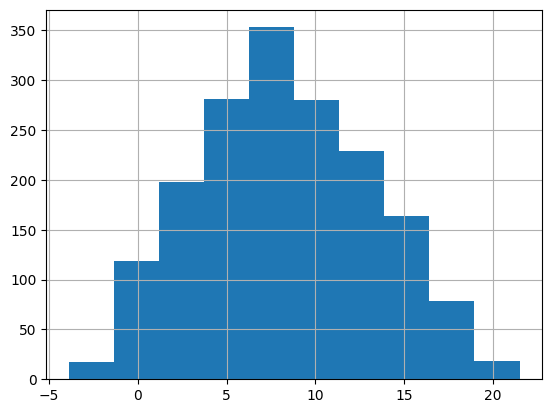

MaxTemp


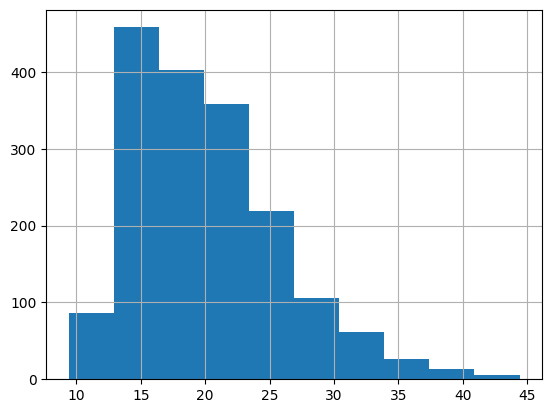

Rainfall


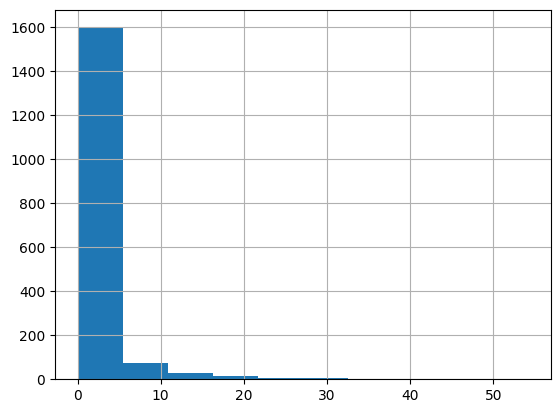

Evaporation


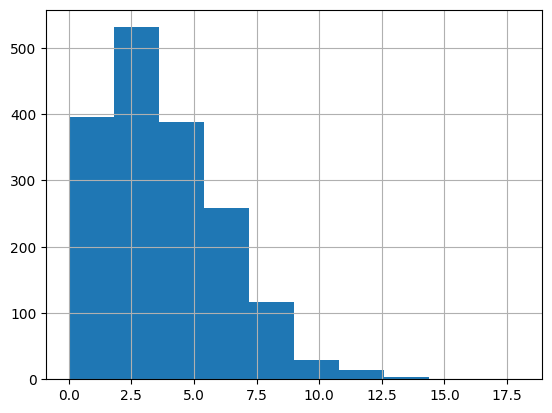

Sunshine


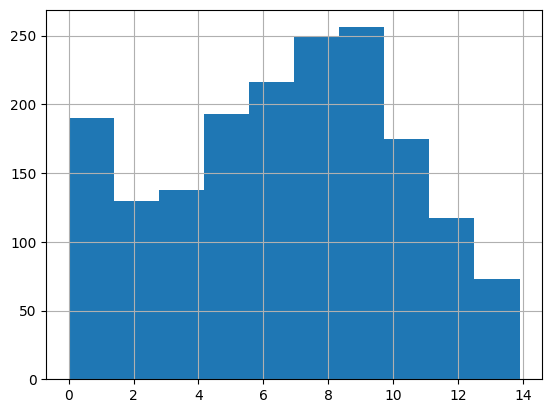

WindGustSpeed


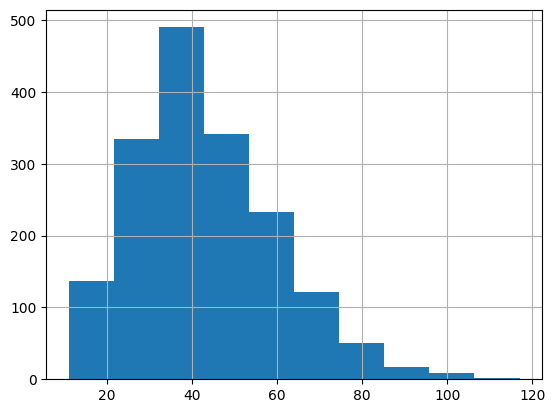

WindSpeed9am


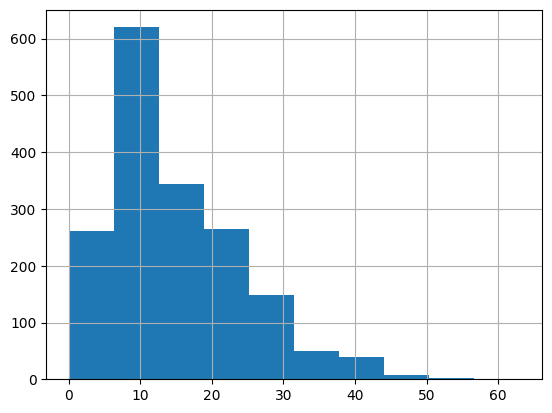

WindSpeed3pm


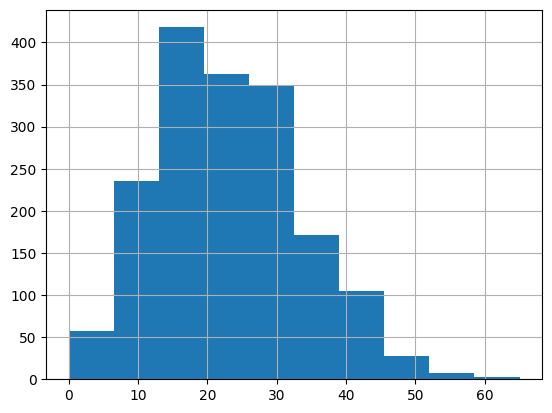

Humidity9am


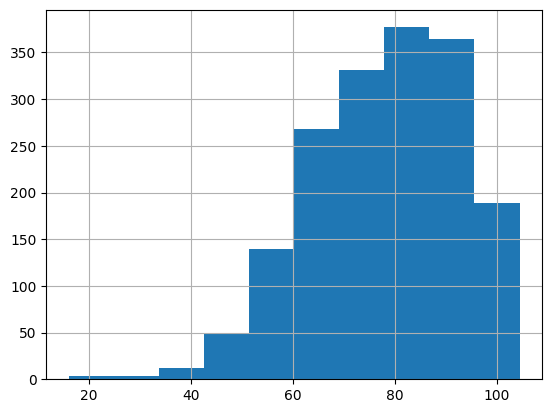

Humidity3pm


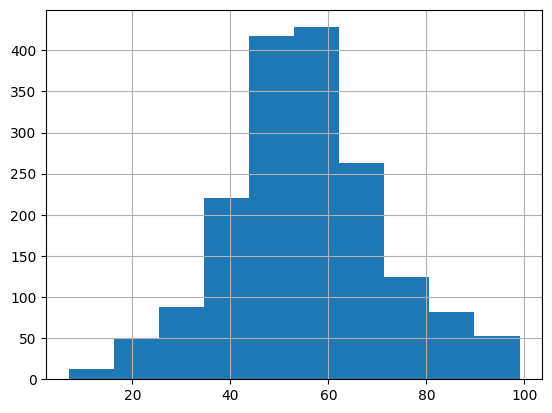

Pressure9am


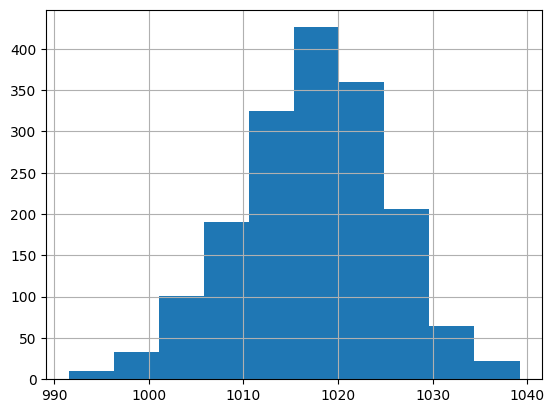

Pressure3pm


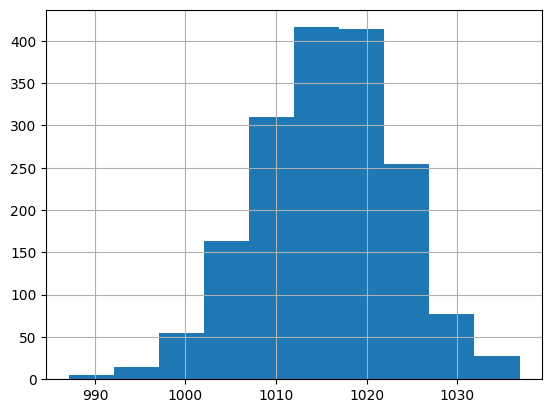

Cloud9am


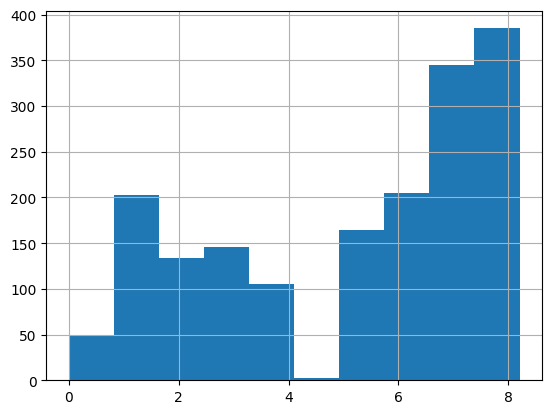

Cloud3pm


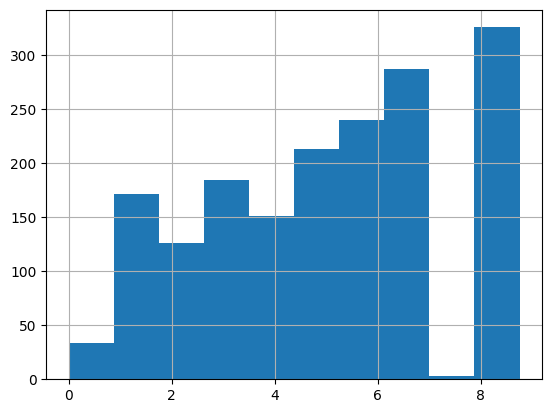

Temp9am


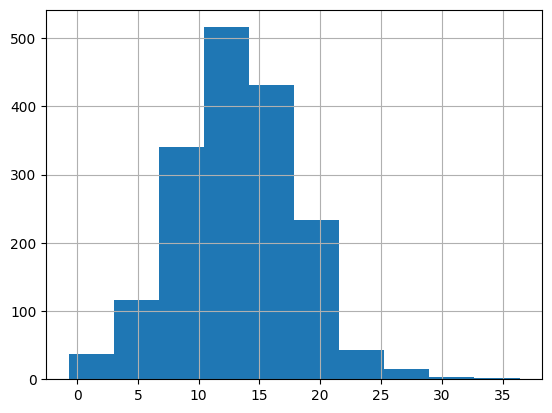

Temp3pm


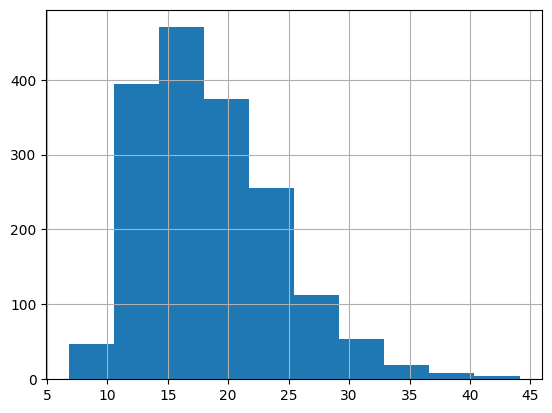

In [226]:
for i, column in enumerate(imputed_data[numerical_features]):
    print(column)
    plt.figure(i)
    imputed_data[column].hist()
    plt.show()

<Axes: xlabel='RainTomorrow', ylabel='count'>

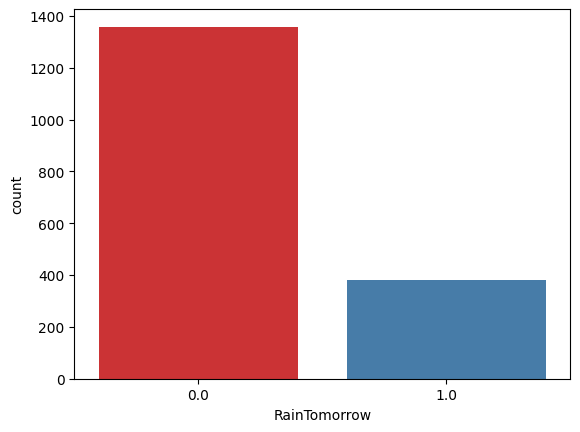

In [227]:
normalized_data = imputed_data.copy()
sns.countplot(x='RainTomorrow', data = normalized_data, palette = "Set1")

[Text(0.5, 1.0, 'RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')]

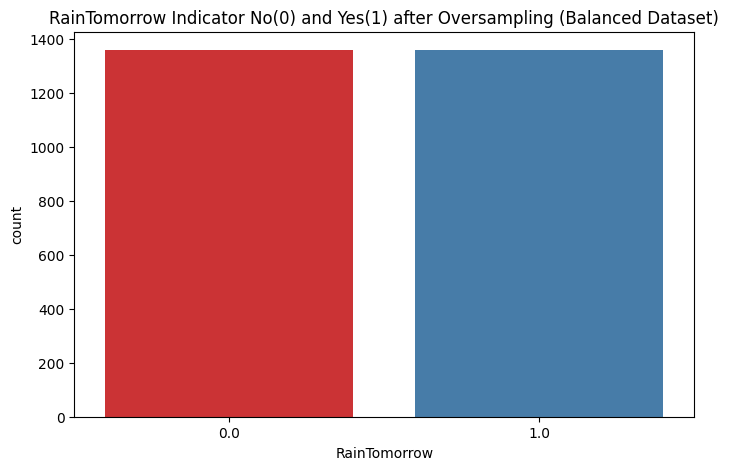

In [228]:
from sklearn.utils import resample

no = normalized_data[normalized_data.RainTomorrow == 0]
yes = normalized_data[normalized_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled_data = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
sns.countplot(x='RainTomorrow', data = oversampled_data, palette = "Set1").set(title='RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


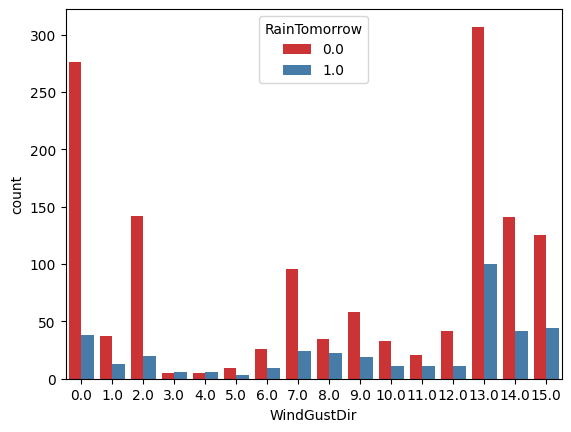

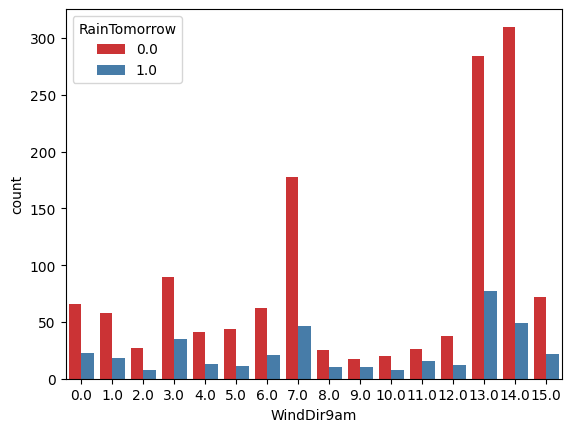

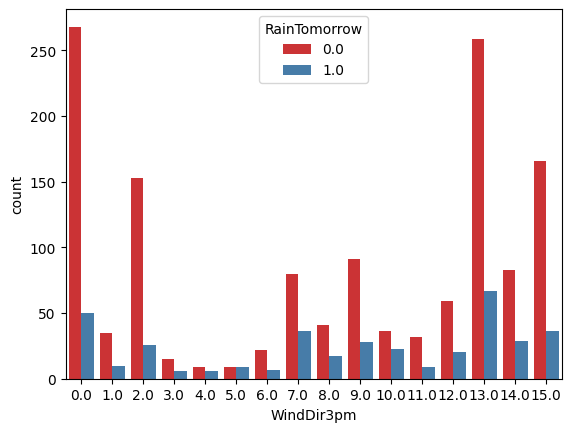

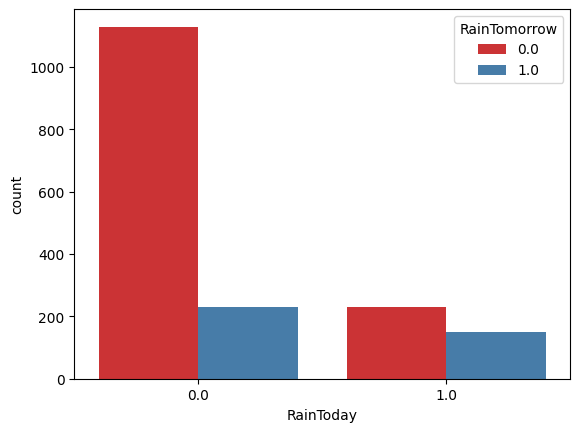

In [229]:
import seaborn as sns
normalized_data = imputed_data.copy()
categorical_features = [ 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday']
print(categorical_features)


for f in categorical_features:
  sns.countplot(x=f, data = normalized_data, palette = "Set1", hue = "RainTomorrow")
  plt.show()

In [230]:
normalized_data[numerical_features].columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

<Axes: >

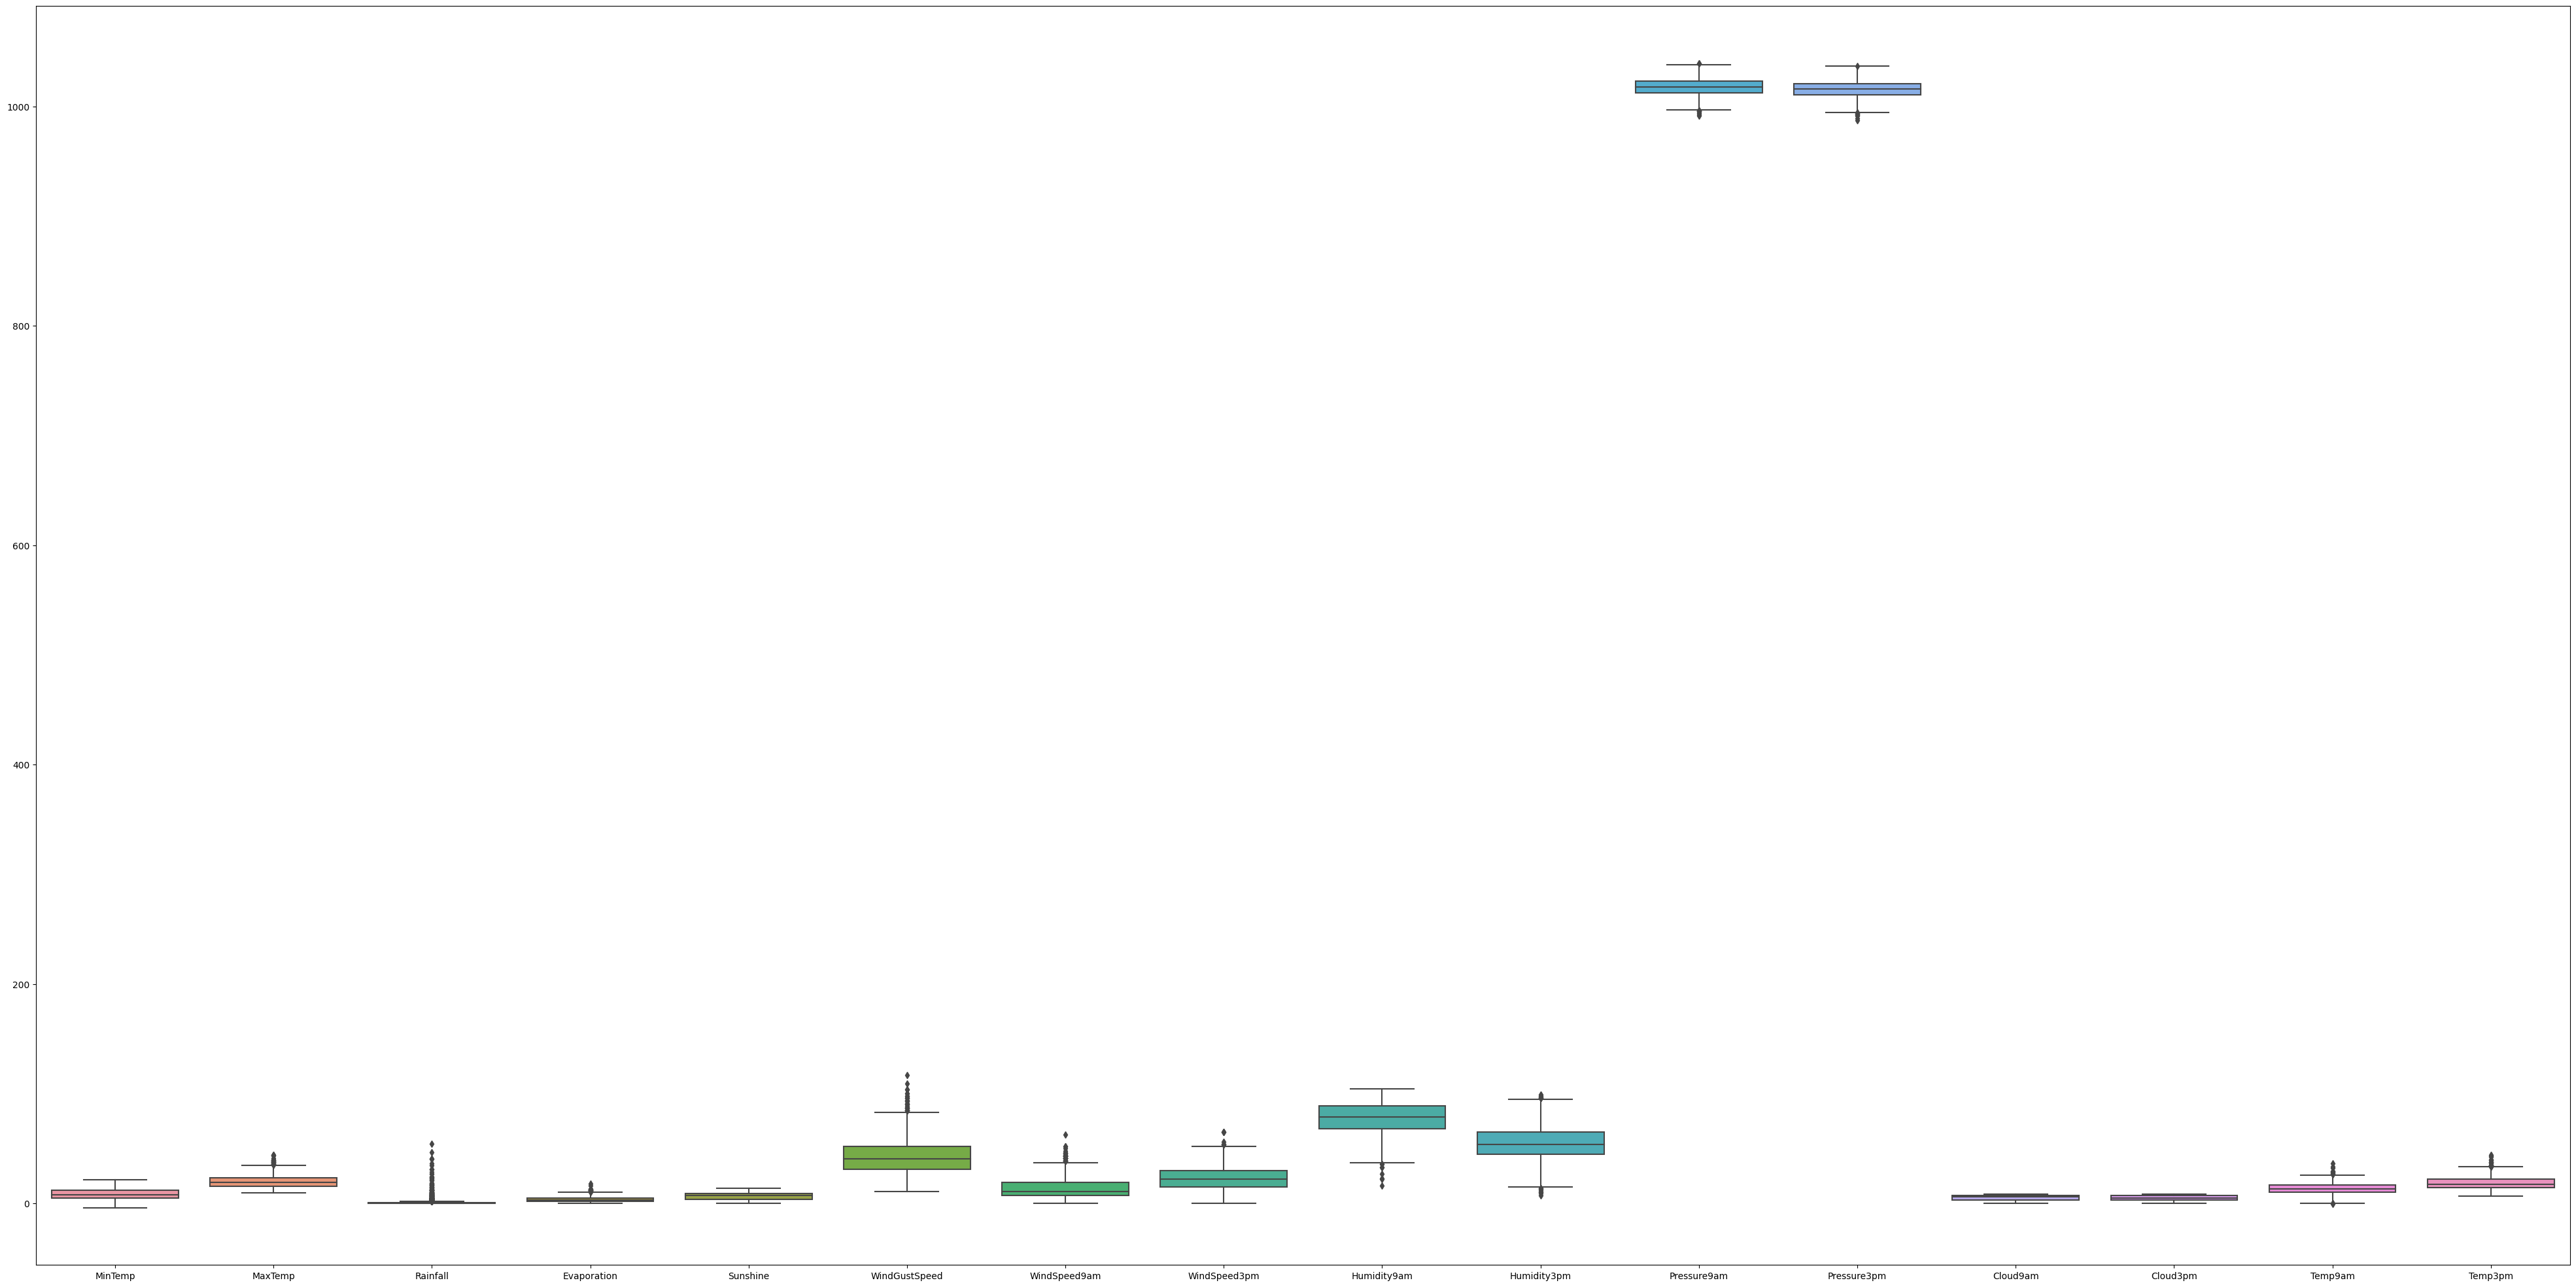

In [231]:
plt.figure(figsize=(50,25))
sns.boxplot(data=normalized_data[numerical_features])

In [234]:
import sklearn.preprocessing as preprocessing
scaled_data = normalized_data.copy()

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(scaled_data)
scaled_data = pd.DataFrame(r_scaler.transform(scaled_data), index=scaled_data.index, columns=scaled_data.columns)

<Axes: >

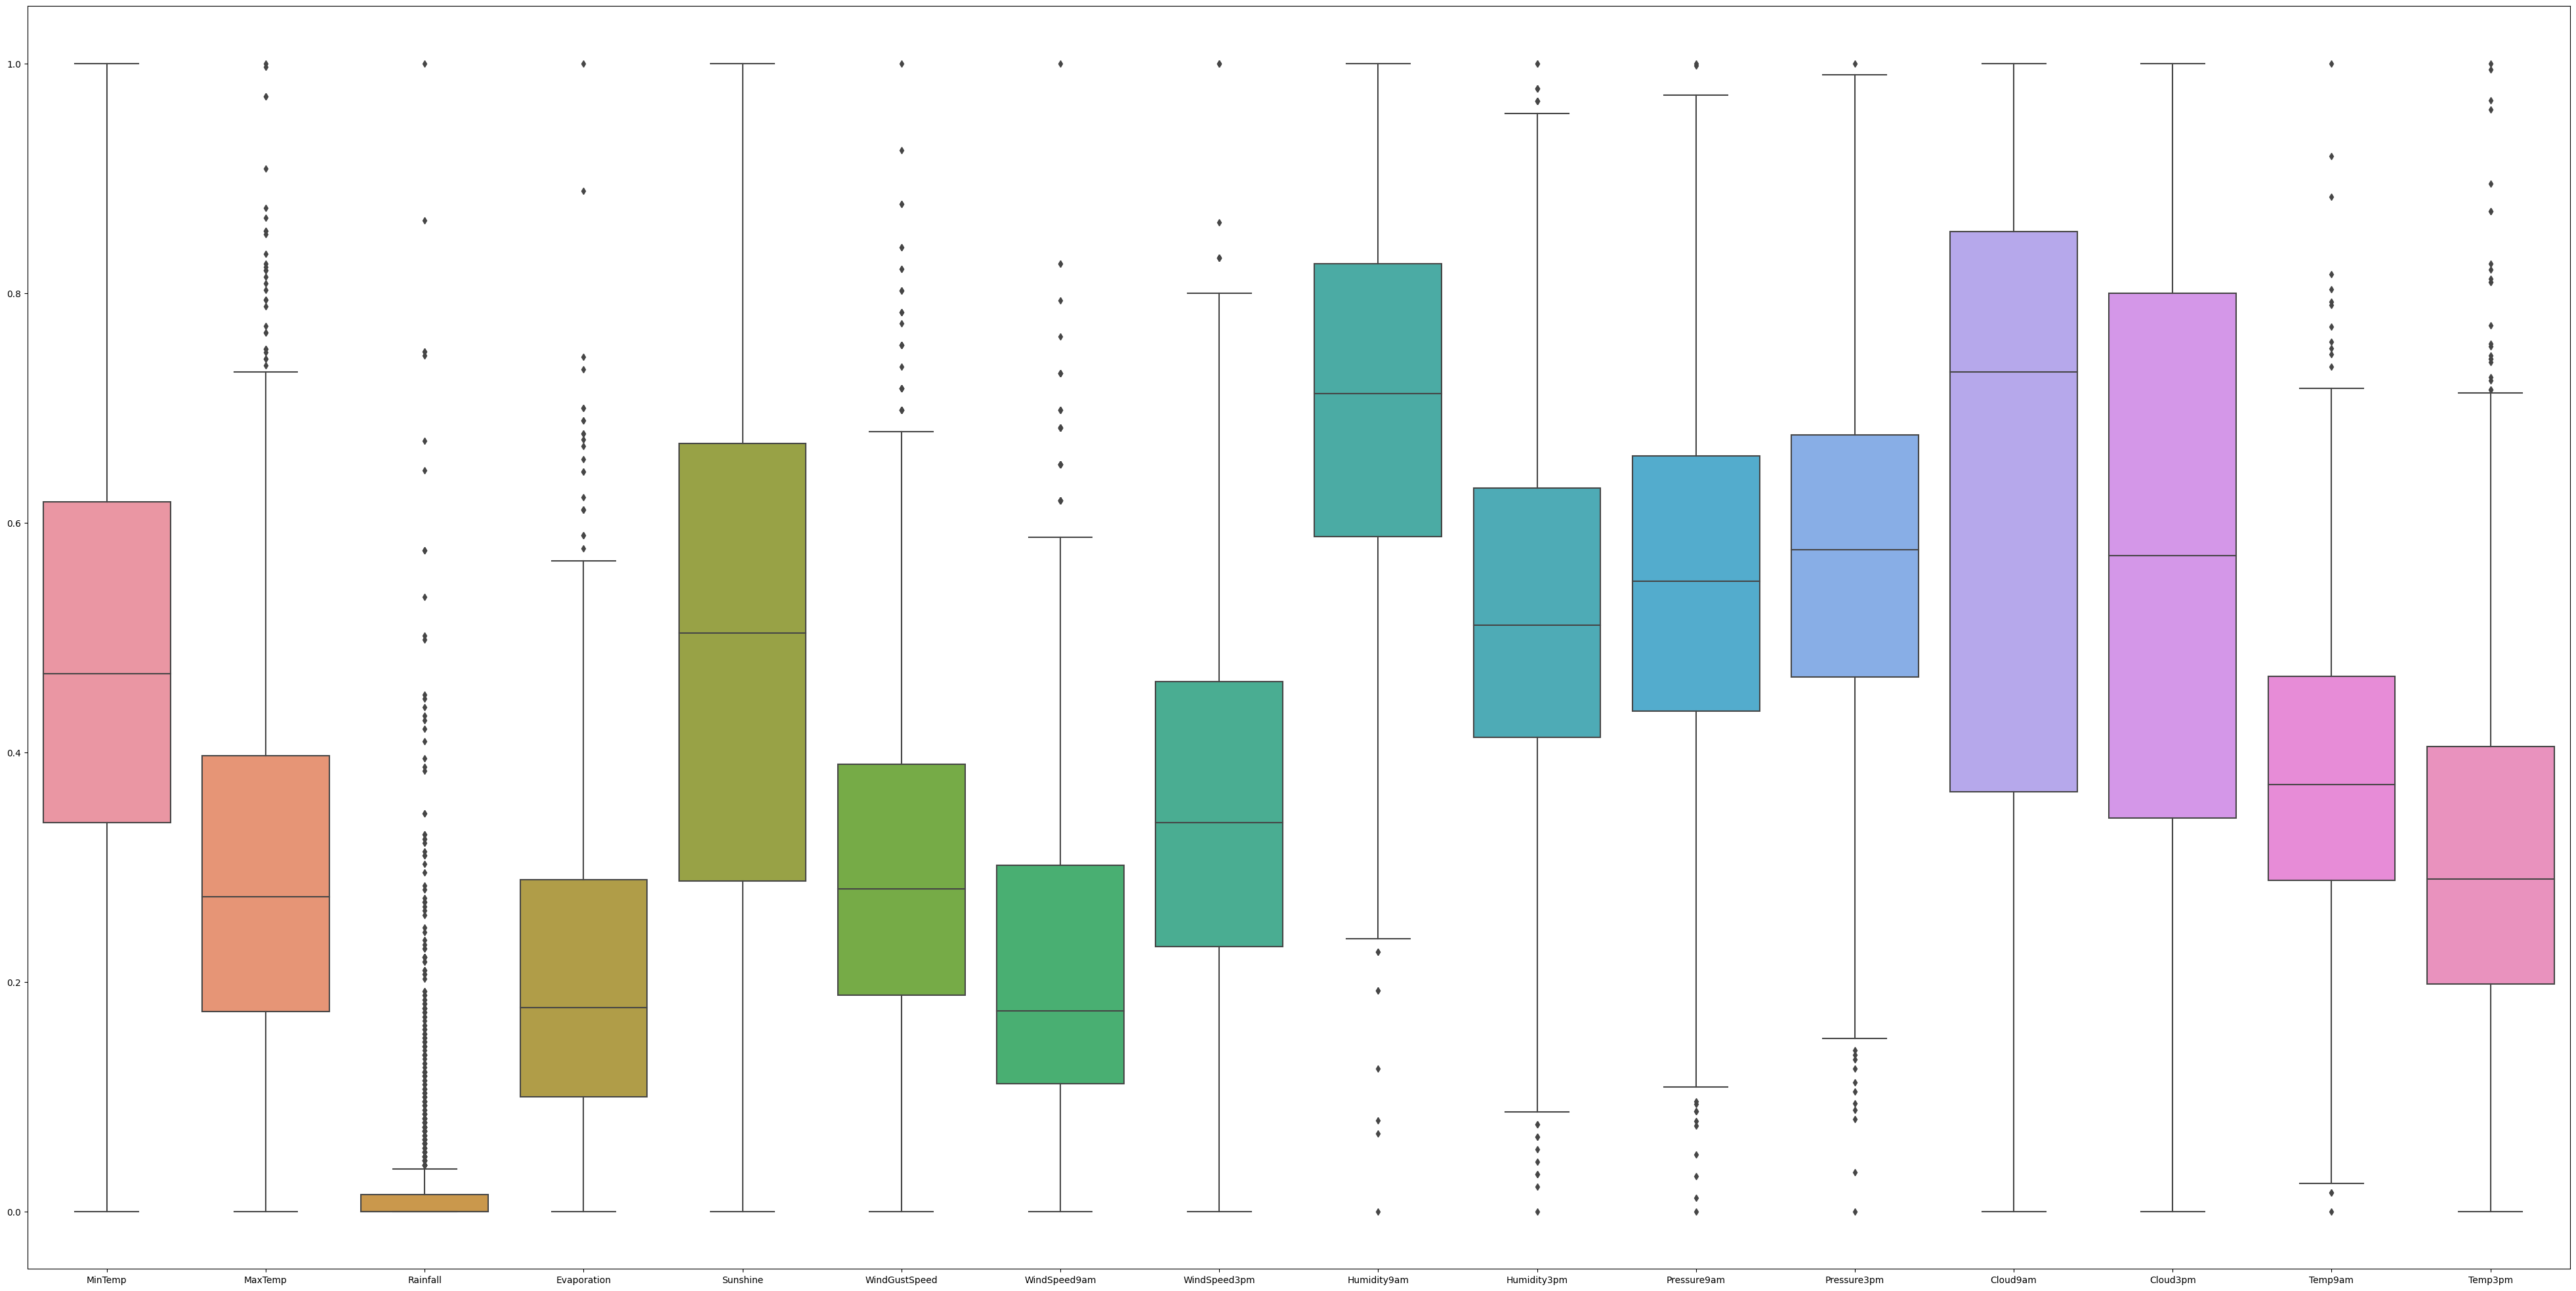

In [235]:
plt.figure(figsize=(50,25))
sns.boxplot(data=scaled_data[numerical_features])

In [236]:
outlier_features = ['Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm']
outlier_range = pd.DataFrame(columns = ["Feature", "Lowerbound", "Upperbound"])

for i,feature in enumerate(outlier_features):
    IQR = scaled_data[feature].quantile(0.75) - scaled_data[col].quantile(0.25)
    lower_bound = scaled_data[feature].quantile(0.25) - (IQR * 3)
    upper_bound = scaled_data[feature].quantile(0.75) + (IQR * 3)
    print(feature + "  outlier is < {lowerbound} and > {upperbound}".format(lowerbound=round(lower_bound,2), upperbound=round(upper_bound,2)))
    outlier_range.loc[i] = [feature, lower_bound, upper_bound]

Rainfall  outlier is < -0.04 and > 0.06
Evaporation  outlier is < -0.77 and > 1.16
WindGustSpeed  outlier is < -0.98 and > 1.56
WindSpeed9am  outlier is < -0.79 and > 1.21
WindSpeed3pm  outlier is < -1.15 and > 1.85
Humidity9am  outlier is < -1.89 and > 3.3
Humidity3pm  outlier is < -1.48 and > 2.52
Pressure9am  outlier is < -1.54 and > 2.63
Pressure3pm  outlier is < -1.56 and > 2.71


In [237]:
outlier_range

Feature  Lowerbound  Upperbound
0       Rainfall   -0.044280    0.059041
1    Evaporation   -0.766667    1.155556
2  WindGustSpeed   -0.979648    1.557770
3   WindSpeed9am   -0.793651    1.206349
4   WindSpeed3pm   -1.153846    1.846154
5    Humidity9am   -1.888423    3.301913
6    Humidity3pm   -1.478261    2.521739
7    Pressure9am   -1.538417    2.632037
8    Pressure3pm   -1.564257    2.706827

In [238]:
X = scaled_data.drop("RainTomorrow", axis=1)
y = scaled_data["RainTomorrow"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [239]:
X.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
61182  0.574803  0.362857       0.0     0.555556  0.827338     1.000000   
61183  0.468504  0.271429       0.0     0.298677  0.841727     0.866667   
61184  0.318898  0.302857       0.0     0.222222  0.654676     0.133333   
61185  0.417323  0.425714       0.0     0.277778  0.755396     0.133333   
61186  0.503937  0.528571       0.0     0.377778  0.776978     0.066667   

       WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure9am  \
61182       0.613208    0.866667    1.000000      0.650794  ...     0.213212   
61183       0.367925    0.866667    1.000000      0.476190  ...     0.517436   
61184       0.207547    0.933333    0.133333      0.111111  ...     0.616047   
61185       0.207547    0.733333    0.000000      0.095238  ...     0.534221   
61186       0.245283    0.933333    0.600000      0.174603  ...     0.416728   

       Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  Month  \
61182     0.327309  0.487624  0.685545  0.514825  0.265416        0.0    0.0   
61183     0.606426  0.365718  0.685545  0.355795  0.265416        0.0    0.0   
61184     0.620482  0.121906  0.685545  0.366577  0.321716        0.0    0.0   
61185     0.528112  0.365718  0.571288  0.460916  0.439678        0.0    0.0   
61186     0.437751  0.731435  0.114258  0.447439  0.501340        0.0    0.0   

       Year       Day  
61182   0.0  0.000000  
61183   0.0  0.033333  
61184   0.0  0.066667  
61185   0.0  0.100000  
61186   0.0  0.133333  

[5 rows x 23 columns]

In [240]:
X.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.610166  0.164669     0.529068 -0.059792   
MaxTemp        0.610166  1.000000 -0.129836     0.563649  0.371350   
Rainfall       0.164669 -0.129836  1.000000    -0.070252 -0.190903   
Evaporation    0.529068  0.563649 -0.070252     1.000000  0.320248   
Sunshine      -0.059792  0.371350 -0.190903     0.320248  1.000000   
WindGustDir   -0.039742 -0.223672  0.089895    -0.088794 -0.152203   
WindGustSpeed  0.237148  0.070378  0.155155     0.269085  0.047318   
WindDir9am    -0.086422 -0.247580  0.042149    -0.045766  0.020205   
WindDir3pm    -0.017423 -0.180943  0.088572    -0.044730 -0.106425   
WindSpeed9am   0.170409 -0.235676  0.184139     0.135542  0.000651   
WindSpeed3pm   0.170034  0.024818  0.116279     0.228306  0.183727   
Humidity9am   -0.163320 -0.223723  0.114750    -0.464663 -0.334574   
Humidity3pm    0.043458 -0.479368  0.205810    -0.312146 -0.639598   
Pressure9am   -0.384522 -0.242540 -0.201827    -0.273386  0.139501   
Pressure3pm   -0.316587 -0.307849 -0.136853    -0.241221  0.100914   
Cloud9am       0.277945 -0.096708  0.137179    -0.019821 -0.546916   
Cloud3pm       0.143064 -0.141147  0.153999    -0.028258 -0.607432   
Temp9am        0.843381  0.800502  0.016634     0.629739  0.162569   
Temp3pm        0.574124  0.968917 -0.130883     0.530462  0.414679   
RainToday      0.131628 -0.209499  0.605876    -0.130550 -0.199358   
Month         -0.250643 -0.225243  0.028226    -0.064513  0.026257   
Year          -0.002260 -0.061093  0.043436    -0.049329 -0.021037   
Day            0.008511  0.031491  0.013638    -0.014164  0.026133   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
MinTemp          -0.039742       0.237148   -0.086422   -0.017423   
MaxTemp          -0.223672       0.070378   -0.247580   -0.180943   
Rainfall          0.089895       0.155155    0.042149    0.088572   
Evaporation      -0.088794       0.269085   -0.045766   -0.044730   
Sunshine         -0.152203       0.047318    0.020205   -0.106425   
WindGustDir       1.000000       0.334543    0.427132    0.708225   
WindGustSpeed     0.334543       1.000000    0.045386    0.330032   
WindDir9am        0.427132       0.045386    1.000000    0.415691   
WindDir3pm        0.708225       0.330032    0.415691    1.000000   
WindSpeed9am      0.352796       0.584100    0.280667    0.370082   
WindSpeed3pm      0.155098       0.764382   -0.020174    0.160877   
Humidity9am      -0.142695      -0.468687   -0.026324   -0.167464   
Humidity3pm       0.033749      -0.107434    0.010302   -0.016239   
Pressure9am      -0.262424      -0.574697    0.047375   -0.249499   
Pressure3pm      -0.165652      -0.495314    0.149045   -0.145159   
Cloud9am          0.053518       0.013785   -0.007781    0.038376   
Cloud3pm          0.206487       0.096790    0.004374    0.160687   
Temp9am          -0.093888       0.290587   -0.210746   -0.056286   
Temp3pm          -0.267516      -0.004470   -0.249879   -0.216515   
RainToday         0.187218       0.210718    0.076216    0.153328   
Month             0.076636       0.103573   -0.015490    0.055880   
Year              0.037193      -0.023436    0.052209    0.012643   
Day              -0.013915      -0.014950    0.004813    0.001751   

               WindSpeed9am  ...  Pressure9am  Pressure3pm  Cloud9am  \
MinTemp            0.170409  ...    -0.384522    -0.316587  0.277945   
MaxTemp           -0.235676  ...    -0.242540    -0.307849 -0.096708   
Rainfall           0.184139  ...    -0.201827    -0.136853  0.137179   
Evaporation        0.135542  ...    -0.273386    -0.241221 -0.019821   
Sunshine           0.000651  ...     0.139501     0.100914 -0.546916   
WindGustDir        0.352796  ...    -0.262424    -0.165652  0.053518   
WindGustSpeed      0.584100  ...    -0.574697    -0.495314  0.013785   
WindDir9am         0.280667  ...     0.047375     0.149045 -0.007781   
WindDir3pm         0.370082  .

<Axes: >

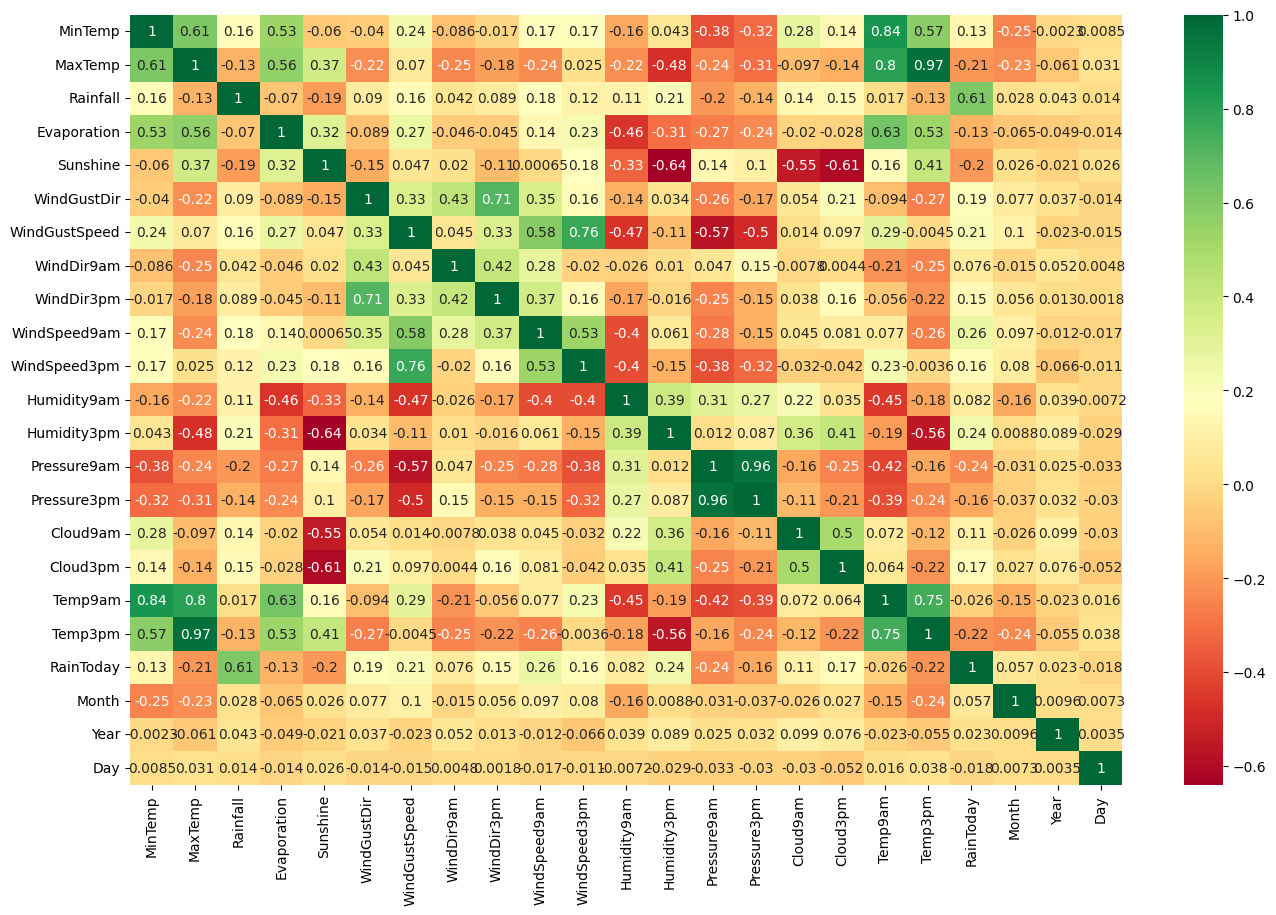

In [241]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(), annot=True, cmap='RdYlGn')

In [242]:
def correlation(df, threshold):

  col_corr = pd.DataFrame(columns = ['Feature1','Feature2','CorrelationCoefficient'])
  corr_matrix = df.corr()
  for i in range(0,len(corr_matrix.columns)):
    #print(abs(corr_matrix.iloc[i]))
    for j in range(i):
      curr = abs(corr_matrix.iloc[i,j])
      if curr > threshold:
        col_corr.loc[i] = [corr_matrix.columns[i],corr_matrix.columns[j], corr_matrix.iloc[i,j]]
        #col_corr.append(corr_matrix.columns[i])

  return col_corr

In [243]:
col_corr = correlation(X,0.75)
print(col_corr)

        Feature1       Feature2  CorrelationCoefficient
10  WindSpeed3pm  WindGustSpeed                0.764382
14   Pressure3pm    Pressure9am                0.958503
17       Temp9am        MaxTemp                0.800502
18       Temp3pm        MaxTemp                0.968917


In [244]:
correlated_set = list(col_corr['Feature1'])
correlated_set.extend(list(col_corr['Feature2']))
print(list(set(correlated_set)))

['MaxTemp', 'WindGustSpeed', 'Pressure3pm', 'WindSpeed3pm', 'Temp3pm', 'Pressure9am', 'Temp9am']


<Axes: >

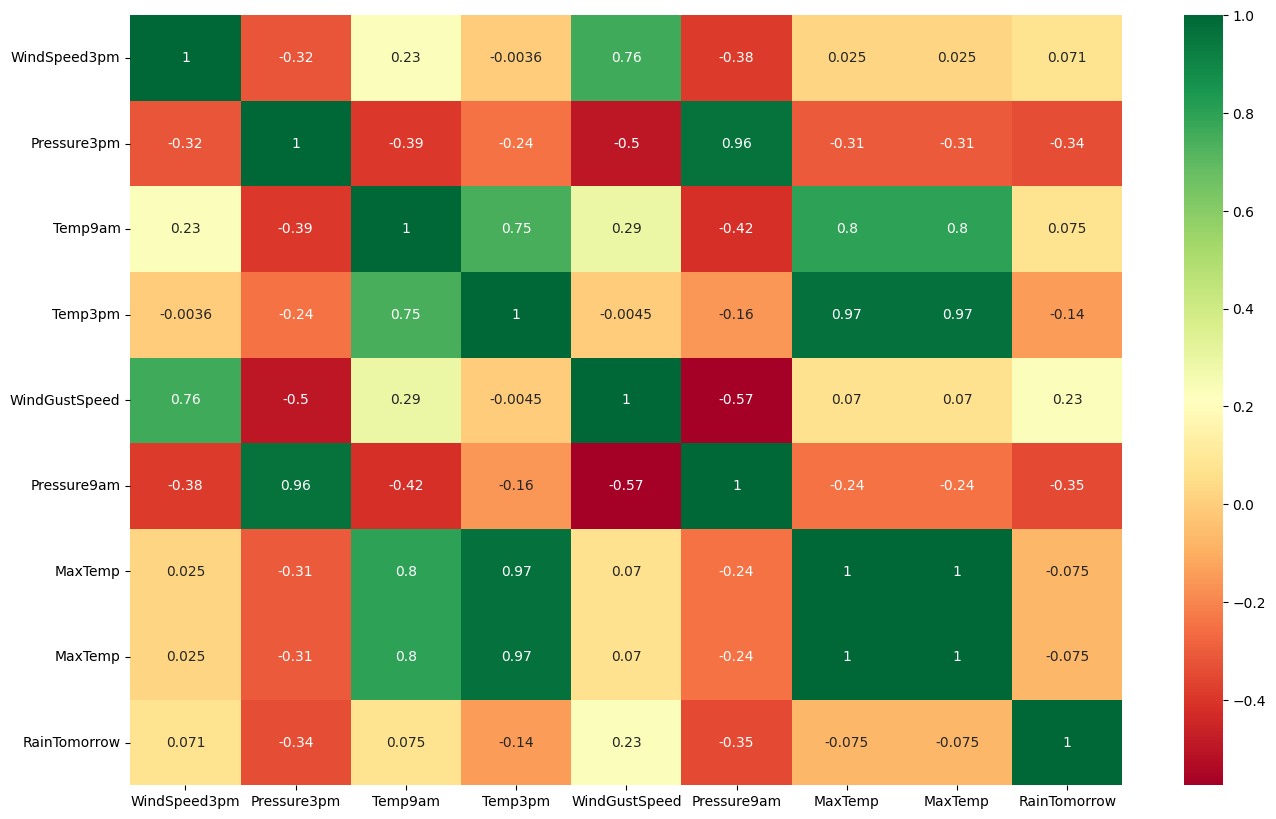

In [245]:
dependancy = correlated_set
dependancy.append('RainTomorrow')
plt.figure(figsize=(16,10))
sns.heatmap(scaled_data[dependancy].corr(), annot=True, cmap='RdYlGn')

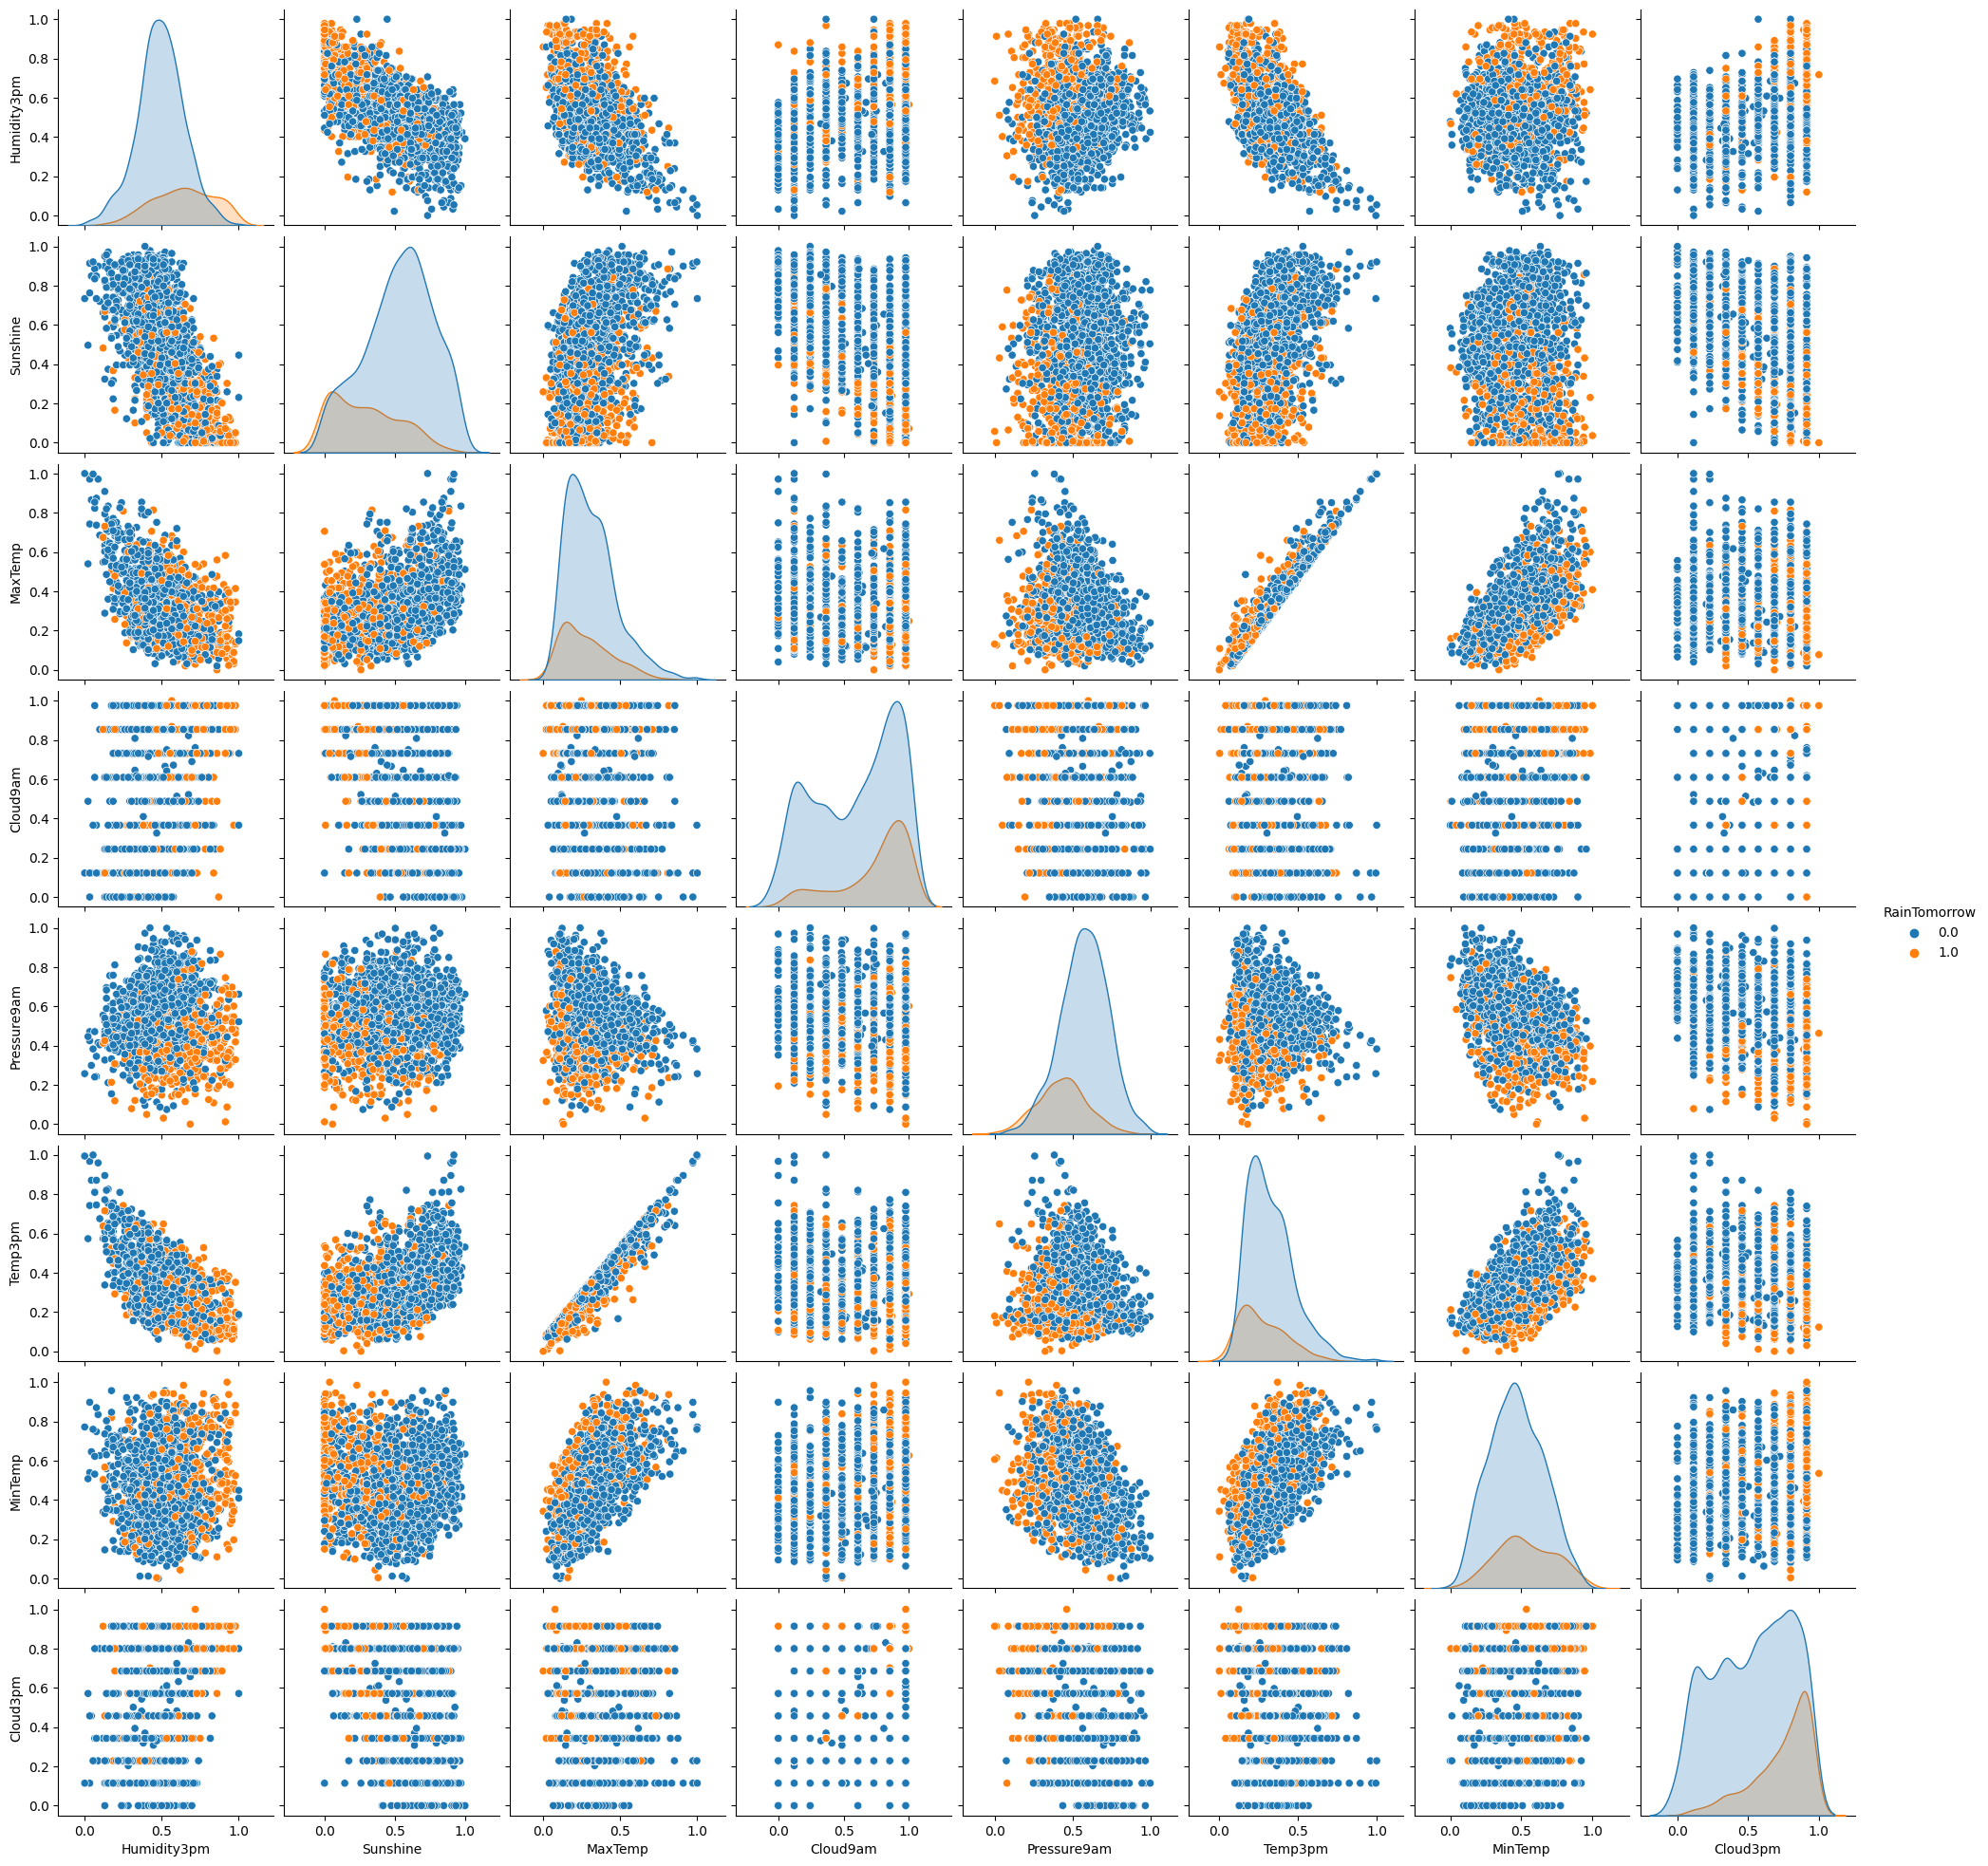

In [246]:
sns.pairplot(data = scaled_data, vars = ('Humidity3pm', 'Sunshine', 'MaxTemp', 'Cloud9am', 'Pressure9am',
       'Temp3pm', 'MinTemp', 'Cloud3pm'), hue='RainTomorrow' )
plt.show()

In [248]:
X_new=X.reset_index()

In [249]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
Kbest = X.columns[selector.get_support(indices=True)]

In [250]:
print(Kbest)

Index(['Rainfall', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


In [253]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
RandForest_RFE = RandomForestClassifier()
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [254]:
print("Best features chosen by RFE: \n")

for i in X_train.columns[rfe.support_]:
    print(i)

Best features chosen by RFE: 

MinTemp
MaxTemp
Evaporation
Sunshine
WindGustSpeed
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


In [258]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
def prediction(X_train,X_test,y_train,y_test):

  X_train_RFE = rfe.transform(X_train)
  X_test_RFE = rfe.transform(X_test)
  RandForest_RFE = RandomForestClassifier()
  RandForest_RFE = RandForest_RFE.fit(X_train_RFE, y_train)

  # Making a prediction and calculting the accuracy
  y_pred = RandForest_RFE.predict(X_test_RFE)
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: ',accuracy)
  print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

  # Print the Confusion Matrix and slice it into four pieces
  cm = confusion_matrix(y_test, y_pred)
  print('Confusion matrix\n\n', cm)
  print('True Positives(TP) = ', cm[0,0])
  print('True Negatives(TN) = ', cm[1,1])
  print('False Positives(FP) = ', cm[0,1])
  print('False Negatives(FN) = ', cm[1,0])

  # visualize confusion matrix with seaborn he[atmap
  cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                  index=['Predict Positive:1', 'Predict Negative:0'])
  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')



  # print classification accuracy
  classification_accuracy = (cm[0,0] + cm[1,1]) / float(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
  print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

  # print classification error
  classification_error = (cm[0,1] + cm[1,0]) / float(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
  print('Classification error : {0:0.4f}'.format(classification_error))

Accuracy:  0.853448275862069
Mean squared error: 0.15
Confusion matrix

 [[265  14]
 [ 37  32]]
True Positives(TP) =  265
True Negatives(TN) =  32
False Positives(FP) =  14
False Negatives(FN) =  37
Classification accuracy : 0.8534
Classification error : 0.1466


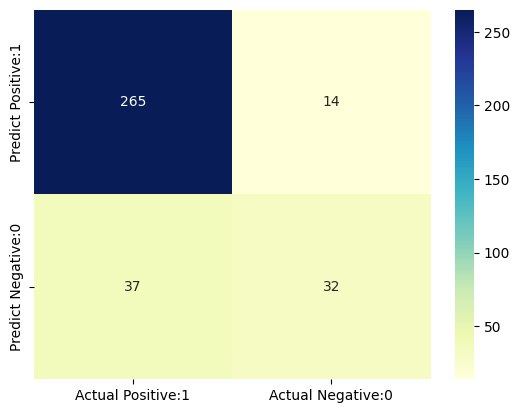

In [259]:
prediction(X_train,X_test,y_train,y_test)

In [260]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [261]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [262]:
logreg.predict_proba(X_test)[:,0]

array([0.93522721, 0.95886126, 0.71745859, 0.80902016, 0.87402563,
       0.2274139 , 0.30824314, 0.97294671, 0.85204486, 0.99245701,
       0.93434811, 0.96744454, 0.89037154, 0.98835374, 0.91568948,
       0.93970092, 0.92016406, 0.14536806, 0.82887582, 0.44381756,
       0.92942224, 0.83317561, 0.88576687, 0.92192643, 0.60632782,
       0.91104264, 0.82789475, 0.93573148, 0.73023967, 0.89810289,
       0.88909575, 0.95802067, 0.69849087, 0.97107118, 0.89890131,
       0.96588513, 0.91260768, 0.65916753, 0.96561295, 0.80664757,
       0.86889553, 0.68782668, 0.41792196, 0.98101852, 0.77908325,
       0.32769659, 0.9409477 , 0.23738626, 0.8590492 , 0.49494827,
       0.94172878, 0.31503686, 0.97338585, 0.9454972 , 0.98333539,
       0.29613856, 0.96562121, 0.7744153 , 0.83734723, 0.19879893,
       0.87380376, 0.9487608 , 0.94084069, 0.77716302, 0.93186594,
       0.91728852, 0.88151222, 0.92464567, 0.95282406, 0.91136691,
       0.9602289 , 0.76118642, 0.95214779, 0.95448331, 0.96114

In [263]:
logreg.predict_proba(X_test)[:,1]

array([0.06477279, 0.04113874, 0.28254141, 0.19097984, 0.12597437,
       0.7725861 , 0.69175686, 0.02705329, 0.14795514, 0.00754299,
       0.06565189, 0.03255546, 0.10962846, 0.01164626, 0.08431052,
       0.06029908, 0.07983594, 0.85463194, 0.17112418, 0.55618244,
       0.07057776, 0.16682439, 0.11423313, 0.07807357, 0.39367218,
       0.08895736, 0.17210525, 0.06426852, 0.26976033, 0.10189711,
       0.11090425, 0.04197933, 0.30150913, 0.02892882, 0.10109869,
       0.03411487, 0.08739232, 0.34083247, 0.03438705, 0.19335243,
       0.13110447, 0.31217332, 0.58207804, 0.01898148, 0.22091675,
       0.67230341, 0.0590523 , 0.76261374, 0.1409508 , 0.50505173,
       0.05827122, 0.68496314, 0.02661415, 0.0545028 , 0.01666461,
       0.70386144, 0.03437879, 0.2255847 , 0.16265277, 0.80120107,
       0.12619624, 0.0512392 , 0.05915931, 0.22283698, 0.06813406,
       0.08271148, 0.11848778, 0.07535433, 0.04717594, 0.08863309,
       0.0397711 , 0.23881358, 0.04785221, 0.04551669, 0.03885

In [264]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8649


In [266]:
!pip install datasist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.2 MB/s eta 0:00:00


In [268]:
from datasist.structdata import detect_outliers


no_outlier_data = scaled_data.copy()

In [269]:
print(len(no_outlier_data))

1737


In [270]:
for i in range(len(outlier_range)):
  no_outlier_data = no_outlier_data[no_outlier_data[outlier_range.loc[i, 'Feature']] >= outlier_range.loc[i, 'Lowerbound']]
  no_outlier_data = no_outlier_data[no_outlier_data[outlier_range.loc[i, 'Feature']] <= outlier_range.loc[i, 'Upperbound']]

len(no_outlier_data)

1520

Accuracy:  0.8322368421052632
Mean squared error: 0.17
Confusion matrix

 [[235  15]
 [ 36  18]]
True Positives(TP) =  235
True Negatives(TN) =  18
False Positives(FP) =  15
False Negatives(FN) =  36
Classification accuracy : 0.8322
Classification error : 0.1678


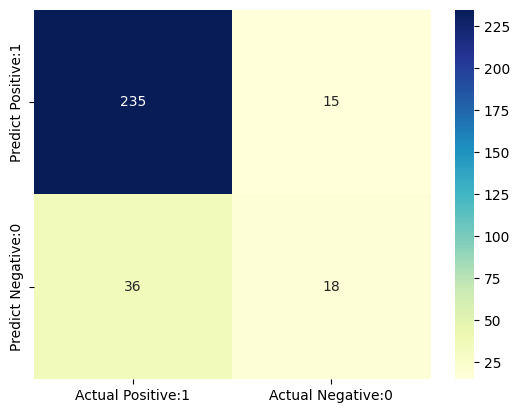

In [271]:
X = no_outlier_data.drop("RainTomorrow", axis=1)
y = no_outlier_data["RainTomorrow"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.2, random_state=0)
prediction(X_red_train,X_red_test,y_red_train,y_red_test)